@[toc](目录)

**Pytorch一般有以下几个流程**


### 1.数据读取

### 2.数据处理

### 3.搭建网络

### 4.模型训练

### 5.模型上线


主要包括以上几个阶段，每个阶段又可以细分，后面再说


### 1.数据读取
CIFAR-10 是由 Hinton 的学生 Alex Krizhevsky 和 Ilya Sutskever 整理的一个用于识别普适物体的小型数据集。一共包含 10 个类别的 RGB 彩色图 片：飞机（ arplane ）、汽车（ automobile ）、鸟类（ bird ）、猫（ cat ）、鹿（ deer ）、狗（ dog ）、蛙类（ frog ）、马（ horse ）、船（ ship ）和卡车（ truck ）。图片的尺寸为 32×32 ，数据集中一共有 50000 张训练圄片和 10000 张测试图片。 

与 MNIST 数据集中目比， CIFAR-10 具有以下不同点：

    • CIFAR-10 是 3 通道的彩色 RGB 图像，而 MNIST 是灰度图像。
    • CIFAR-10 的图片尺寸为 32×32， 而 MNIST 的图片尺寸为 28×28，比 MNIST 稍大。
    • 相比于手写字符， CIFAR-10 含有的是现实世界中真实的物体，不仅噪声很大，而且物体的比例、 特征都不尽相同，这为识别带来很大困难。

首先使用`torchvision`加载和归一化我们的训练数据和测试数据。

    a、`torchvision`这个东西，实现了常用的一些深度学习的相关的图像数据的加载功能，比如cifar10、Imagenet、Mnist等等的，保存在`torchvision.datasets`模块中。
    
    b、同时，也封装了一些处理数据的方法。保存在`torchvision.transforms`模块中
    
    c、还封装了一些模型和工具封装在相应模型中,比如`torchvision.models`当中就包含了AlexNet，VGG，ResNet，SqueezeNet等模型。

In [1]:
#首先导入torch，torchvision模块

import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

**由于torchvision的datasets的输出是[0,1]的PILImage，所以我们先先归一化为[-1,1]的Tensor**

首先定义了一个变换transform，利用的是上面提到的transforms模块中的Compose( )把多个变换组合在一起，可以看到这里面组合了ToTensor和Normalize这两个变换

`transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))`前面的（0.5，0.5，0.5） 是 R G B 三个通道上的均值， 后面(0.5, 0.5, 0.5)是三个通道的标准差，注意通道顺序是 R G B ，用过opencv的同学应该知道openCV读出来的图像是 BRG顺序。这两个tuple数据是用来对RGB 图像做归一化的，如其名称 Normalize 所示这里都取0.5只是一个近似的操作，实际上其均值和方差并不是这么多，但是就这个示例而言 影响可不计。精确值是通过分别计算R,G,B三个通道的数据算出来的。


In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 

In [3]:
# datasets.CIFAR10( )也是封装好了的，就在我前面提到的torchvision.datasets块中
trainset = datasets.CIFAR10(root='D:/CIFAR-10', train=True,download=True, transform=transform)

Files already downloaded and verified


 `trainloader`其实是一个比较重要的东西，我们后面就是通过`trainloader`把数据传入网络，当然这里的`trainloader`其实是个变量名，可以随便取，重点是他是由后面的`torch.utils.data.DataLoader()`定义的，这个东西来源于`torch.utils.data`模块

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,shuffle=True, num_workers=2)

In [5]:
# 对于测试集的操作和训练集一样，我就不赘述了
testset = torchvision.datasets.CIFAR10(root='D:/CIFAR-10', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,shuffle=False, num_workers=2)
    # 类别信息也是需要我们给定的
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [6]:
trainset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
trainset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

### 2. 查看数据（格式，大小，形状）

In [8]:
trainset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [9]:
trainset.data.shape#50000是图片数量，32x32是图片大小，3是通道数量RGB

(50000, 32, 32, 3)

In [10]:
trainset.data[10000][31][31][2]

168

In [11]:
#查看数据类型
print(type(trainset.data))
print(type(trainset))

<class 'numpy.ndarray'>
<class 'torchvision.datasets.cifar.CIFAR10'>


In [12]:
trainset[10000][0][2][31][31]#10000为图片数量，0表示取前面的数据，2表示通道数RGB，32*32表示图片大小

tensor(0.3176)

### 总结：
    
    `trainset.data.shape`是标准的numpy.ndarray类型，其中50000是图片数量，32x32是图片大小，3是通道数量RGB；
    `trainset`是标准的？？类型，其中50000为图片数量，0表示取前面的数据，2表示3通道数RGB，32*32表示图片大小
    
 ### 3. 查看图片

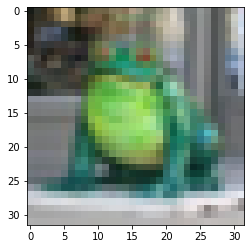

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(trainset.data[19])

### np.ndarray转为torch.Tensor

在深度学习中，原始图像需要转换为深度学习框架自定义的数据格式，在pytorch中，需要转为`torch.Tensor`。
pytorch提供了`torch.Tensor` 与`numpy.ndarray`转换为接口：

方法名|作用
--|--
`torch.from_numpy(xxx)`|`numpy.ndarray`转为torch.Tensor
`tensor1.numpy()`|获取tensor1对象的numpy格式数据

`torch.Tensor` 高维矩阵的表示： N x C x H x W

`numpy.ndarray` 高维矩阵的表示：N x H x W x C

因此在两者转换的时候需要使用`numpy.transpose( )` 方法 。


In [14]:
# numpy image: H x W x C
# torch image: C x H x W
# np.transpose( xxx,  (2, 0, 1))   # 将 H x W x C 转化为 C x H x W
tensor_skimage = torch.from_numpy(np.transpose(trainset.data[19], (2, 0, 1)))
tensor_skimage.size()

torch.Size([3, 32, 32])

### torch.Tensor转numpy.ndarray

In [15]:
# np.transpose( xxx,  (2, 0, 1))   # 将 C x H x W 转化为 H x W x C
img_skimage_2 = np.transpose(trainset[19][0].numpy(), (1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


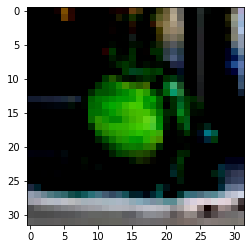

In [16]:
plt.imshow(img_skimage_2)

### 4.定义网络（MobileNet v2）

在之前的文章中讲的AlexNet、VGG、GoogLeNet以及ResNet网络，它们都是传统卷积神经网络（都是使用的传统卷积层），缺点在于内存需求大、运算量大导致无法在移动设备以及嵌入式设备上运行。而本文要讲的MobileNet网络就是专门为**移动端，嵌入式端**而设计。

### MobileNet v1

MobileNet网络是由google团队在2017年提出的，专注于移动端或者嵌入式设备中的轻量级CNN网络。相比传统卷积神经网络，在准确率小幅降低的前提下大大减少模型参数与运算量。(相比VGG16准确率减少了0.9%，但模型参数只有VGG的1/32)。

要说MobileNet网络的优点，无疑是其中的**Depthwise Convolution结构**(大大减少运算量和参数数量)。下图展示了传统卷积与DW卷积的差异，在传统卷积中，每个卷积核的channel与输入特征矩阵的channel相等（每个卷积核都会与输入特征矩阵的每一个维度进行卷积运算）。而在DW卷积中，每个卷积核的channel都是等于1的（每个卷积核只负责输入特征矩阵的一个channel，故卷积核的个数必须等于输入特征矩阵的channel数，从而使得输出特征矩阵的channel数也等于输入特征矩阵的channel数）

<img src="https://img-blog.csdnimg.cn/20200426162556656.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM3NTQxMDk3,size_16,color_FFFFFF,t_70#pic_center" />


刚刚说了使用DW卷积后输出特征矩阵的channel是与输入特征矩阵的channel相等的，如果想改变/自定义输出特征矩阵的channel，那只需要在DW卷积后接上一个PW卷积即可，如下图所示，其实PW卷积就是普通的卷积而已（只不过卷积核大小为1）。通常DW卷积和PW卷积是放在一起使用的，一起叫做**Depthwise Separable Convolution（深度可分卷积）**。


<img src="https://img-blog.csdnimg.cn/20200426163946303.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM3NTQxMDk3,size_16,color_FFFFFF,t_70#pic_center" />


那Depthwise Separable Convolution（深度可分卷积）与传统的卷积相比有到底能节省多少计算量呢，下图对比了这两个卷积方式的计算量，其中Df是输入特征矩阵的宽高（这里假设宽和高相等），Dk是卷积核的大小，M是输入特征矩阵的channel，N是输出特征矩阵的channel，卷积计算量近似等于卷积核的高 x 卷积核的宽 x 卷积核的channel x 输入特征矩阵的高 x 输入特征矩阵的宽（这里假设stride等于1），在我们mobilenet网络中DW卷积都是是使用3x3大小的卷积核。所以理论上普通卷积计算量是DW+PW卷积的8到9倍（公式来源于原论文）：


<img src="https://img-blog.csdnimg.cn/20200426164254206.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM3NTQxMDk3,size_16,color_FFFFFF,t_70#pic_center" />


在了解完Depthwise Separable Convolution（深度可分卷积）后在看下mobilenet v1的网络结构，左侧的表格是mobileNetv1的网络结构，表中标Conv的表示普通卷积，Conv dw代表刚刚说的DW卷积，s表示步距，根据表格信息就能很容易的搭建出mobileNet v1网络。在mobilenetv1原论文中，还提出了两个超参数，一个是α一个是β。α参数是一个倍率因子，用来调整卷积核的个数，β是控制输入网络的图像尺寸参数，下图右侧给出了使用不同α和β网络的分类准确率，计算量以及模型参数：

<img src="https://img-blog.csdnimg.cn/20200426165207571.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM3NTQxMDk3,size_16,color_FFFFFF,t_70#pic_center" />


### MobileNet v2

在MobileNet v1的网络结构表中能够发现，网络的结构就像VGG一样是个直筒型的，不像ResNet网络有shorcut之类的连接方式。而且有人反映说MobileNet v1网络中的DW卷积很容易训练废掉，效果并没有那么理想。所以我们接着看下MobileNet v2网络。

MobileNet v2网络是由google团队在2018年提出的，**相比MobileNet V1网络，准确率更高，模型更小**。刚刚说了MobileNet v1网络中的亮点是DW卷积，那么在MobileNet v2中的亮点就是**Inverted residual block（倒残差结构）**，如下下图所示，左侧是ResNet网络中的残差结构，右侧就是MobileNet v2中的倒残差结构。**在残差结构中是1x1卷积降维->3x3卷积->1x1卷积升维，在倒残差结构中正好相反，是1x1卷积升维->3x3DW卷积->1x1卷积降维**。为什么要这样做，原文的解释是高维信息通过ReLU激活函数后丢失的信息更少（**注意倒残差结构中基本使用的都是ReLU6激活函数，但是最后一个1x1的卷积层使用的是线性激活函数**）。


<img src="https://img-blog.csdnimg.cn/20200426171005366.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM3NTQxMDk3,size_16,color_FFFFFF,t_70#pic_center" />


在使用倒残差结构时需要注意下，并不是所有的倒残差结构都有shortcut连接，只有当stride=1且输入特征矩阵与输出特征矩阵shape相同时才有shortcut连接（只有当shape相同时，两个矩阵才能做加法运算，当stride=1时并不能保证输入特征矩阵的channel与输出特征矩阵的channel相同）。


<img src="https://img-blog.csdnimg.cn/20200426171906852.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM3NTQxMDk3,size_16,color_FFFFFF,t_70#pic_center" />


下图是MobileNet v2网络的结构表，其中t代表的是扩展因子（倒残差结构中第一个1x1卷积的扩展因子），c代表输出特征矩阵的channel，n代表倒残差结构重复的次数，s代表步距（注意：这里的步距只是针对重复n次的第一层倒残差结构，后面的都默认为1）。

<img src="https://img-blog.csdnimg.cn/20200426172803520.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM3NTQxMDk3,size_16,color_FFFFFF,t_70#pic_center" />


In [17]:
import torch.nn as nn
import torch

def _make_divisible(ch, divisor=8, min_ch=None):
    """
    This function is taken from the original tf repo.
    It ensures that all layers have a channel number that is divisible by 8
    It can be seen here:
    https://github.com/tensorflow/models/blob/master/research/slim/nets/mobilenet/mobilenet.py
    """
    if min_ch is None:
        min_ch = divisor
    new_ch = max(min_ch, int(ch + divisor / 2) // divisor * divisor)
    # Make sure that round down does not go down by more than 10%.
    if new_ch < 0.9 * ch:
        new_ch += divisor
    return new_ch


class ConvBNReLU(nn.Sequential):
    def __init__(self, in_channel, out_channel, kernel_size=3, stride=1, groups=1):
        padding = (kernel_size - 1) // 2
        super(ConvBNReLU, self).__init__(
            nn.Conv2d(in_channel, out_channel, kernel_size, stride, padding, groups=groups, bias=False),
            nn.BatchNorm2d(out_channel),
            nn.ReLU6(inplace=True)
        )


class InvertedResidual(nn.Module):
    def __init__(self, in_channel, out_channel, stride, expand_ratio):
        super(InvertedResidual, self).__init__()
        hidden_channel = in_channel * expand_ratio
        self.use_shortcut = stride == 1 and in_channel == out_channel

        layers = []
        if expand_ratio != 1:
            # 1x1 pointwise conv
            layers.append(ConvBNReLU(in_channel, hidden_channel, kernel_size=1))
        layers.extend([
            # 3x3 depthwise conv
            ConvBNReLU(hidden_channel, hidden_channel, stride=stride, groups=hidden_channel),
            # 1x1 pointwise conv(linear)
            nn.Conv2d(hidden_channel, out_channel, kernel_size=1, bias=False),
            nn.BatchNorm2d(out_channel),
        ])

        self.conv = nn.Sequential(*layers)

    def forward(self, x):
        if self.use_shortcut:
            return x + self.conv(x)
        else:
            return self.conv(x)


class MobileNetV2(nn.Module):
    def __init__(self, num_classes=1000, alpha=1.0, round_nearest=8):
        super(MobileNetV2, self).__init__()
        block = InvertedResidual
        input_channel = _make_divisible(32 * alpha, round_nearest)
        last_channel = _make_divisible(1280 * alpha, round_nearest)

        inverted_residual_setting = [
            # t, c, n, s
            [1, 16, 1, 1],
            [6, 24, 2, 2],
            [6, 32, 3, 2],
            [6, 64, 4, 2],
            [6, 96, 3, 1],
            [6, 160, 3, 2],
            [6, 320, 1, 1],
        ]

        features = []
        # conv1 layer
        features.append(ConvBNReLU(3, input_channel, stride=2))
        # building inverted residual residual blockes
        for t, c, n, s in inverted_residual_setting:
            output_channel = _make_divisible(c * alpha, round_nearest)
            for i in range(n):
                stride = s if i == 0 else 1
                features.append(block(input_channel, output_channel, stride, expand_ratio=t))
                input_channel = output_channel
        # building last several layers
        features.append(ConvBNReLU(input_channel, last_channel, 1))
        # combine feature layers
        self.features = nn.Sequential(*features)

        # building classifier
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(last_channel, num_classes)
        )

        # weight initialization
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out')
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.ones_(m.weight)
                nn.init.zeros_(m.bias)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.zeros_(m.bias)

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [18]:
#这里我只敢选择resnet18网络，其他会死机。
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = MobileNetV2(num_classes=10).to(device)
print(net)

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

### 5. 定义损失函数和优化器 
    pytorch将深度学习中常用的优化方法全部封装在torch.optim之中，所有的优化方法都是继承基类optim.Optimizier
    
    损失函数是封装在神经网络工具箱nn中的,包含很多损失函数


In [19]:
import torch.optim as optim
#用到了神经网络工具箱 nn 中的交叉熵损失函数
loss_function = nn.CrossEntropyLoss() 
# 使用SGD（随机梯度下降）优化，学习率为0.001，动量为0.9
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)  

### 6. 训练

In [20]:
best_acc = 0.0
save_path = 'D:/CIFAR-10/model/MobileNetV2.pth'
for epoch in range(50):
    # train
    net.train()
    running_loss = 0.0
    for step, data in enumerate(trainloader, start=0):
        images, labels = data
        optimizer.zero_grad()
        logits = net(images.to(device))
        loss = loss_function(logits, labels.to(device))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        # print train process
        rate = (step+1)/len(trainloader)
        a = "*" * int(rate * 50)
        b = "." * int((1 - rate) * 50)
        print("\rtrain loss: {:^3.0f}%[{}->{}]{:.4f}".format(int(rate*100), a, b, loss), end="")
    print()

    # validate
    net.eval()
    acc = 0.0  # accumulate accurate number / epoch
    with torch.no_grad():
        for val_data in testloader:
            val_images, val_labels = val_data
            outputs = net(val_images.to(device))  # eval model only have last output layer
            # loss = loss_function(outputs, test_labels)
            predict_y = torch.max(outputs, dim=1)[1]
            acc += (predict_y == val_labels.to(device)).sum().item()
        val_accurate = acc / len(testset)
        if val_accurate > best_acc:
            best_acc = val_accurate
            torch.save(net.state_dict(), save_path)
        print('[epoch %d] train_loss: %.3f  test_accuracy: %.3f' %
              (epoch + 1, running_loss / step, val_accurate))

print('Finished Training')

train loss: 100%[**************************************************->]1.8978
[epoch 1] train_loss: 1.901  test_accuracy: 0.387
train loss: 100%[**************************************************->]1.5872
[epoch 2] train_loss: 1.588  test_accuracy: 0.456
train loss: 100%[**************************************************->]1.3119
[epoch 3] train_loss: 1.422  test_accuracy: 0.485
train loss: 100%[**************************************************->]1.3998
[epoch 4] train_loss: 1.292  test_accuracy: 0.546
train loss: 100%[**************************************************->]1.0835
[epoch 5] train_loss: 1.191  test_accuracy: 0.568
train loss: 100%[**************************************************->]1.3598
[epoch 6] train_loss: 1.102  test_accuracy: 0.583
train loss: 100%[**************************************************->]0.8214
[epoch 7] train_loss: 1.041  test_accuracy: 0.603
train loss: 100%[**************************************************->]1.3187
[epoch 8] train_loss: 0.980  test_

KeyboardInterrupt: 

In [21]:
from torch.autograd import Variable
# 定义2个存储每类中测试正确的个数的 列表，初始化为0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    
    for data in testloader:
        net.eval()
        images, labels = data
        images=Variable(images).cuda()
        labels=Variable(labels).cuda()
        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)
    #4组(batch_size)数据中，输出于label相同的，标记为1，否则为0
        c = (predicted == labels).squeeze()
        for i in range(16):      # 因为每个batch都有4张图片，所以还需要一个4的小循环
            label = labels[i]   # 对各个类的进行各自累加
            class_correct[label] += c[i]
            class_total[label] += 1
 
 
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 64 %
Accuracy of   car : 85 %
Accuracy of  bird : 53 %
Accuracy of   cat : 40 %
Accuracy of  deer : 57 %
Accuracy of   dog : 43 %
Accuracy of  frog : 75 %
Accuracy of horse : 63 %
Accuracy of  ship : 81 %
Accuracy of truck : 69 %


### 8. 保存模型

In [22]:
# torch.save(net, 'D:/CIFAR-10/model/ResNet18-128.pth')

### 9. 预测

In [23]:
import torch
from PIL import Image
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
 
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = MobileNetV2(num_classes=10)

model.load_state_dict(torch.load('D:/CIFAR-10/model/MobileNetV2.pth'))# 加载模型
model = model.to(device)
model.eval()  # 把模型转为test模式

# 读取要预测的图片
img = Image.open("D:/CIFAR-10/airplan.jpg").convert('RGB') # 读取图像

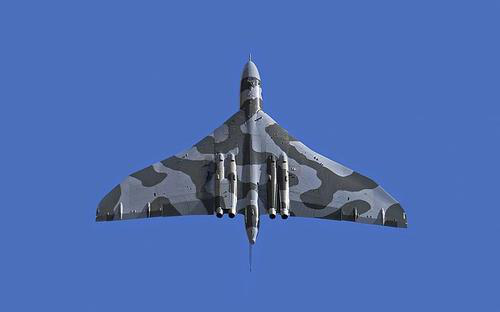

In [24]:
img

In [25]:
trans = transforms.Compose([transforms.Scale((32,32)),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=(0.5, 0.5, 0.5), 
                                                 std=(0.5, 0.5, 0.5)),
                           ])
 
img = trans(img)
img = img.to(device)
# 图片扩展多一维,因为输入到保存的模型中是4维的[batch_size,通道,长，宽]，而普通图片只有三维，[通道,长，宽]
img = img.unsqueeze(0)  
    # 扩展后，为[1，1，28，28]
output = model(img)
prob = F.softmax(output,dim=1) #prob是10个分类的概率
print("概率",prob)
value, predicted = torch.max(output.data, 1)
print("类别",predicted.item())
print(value)
pred_class = classes[predicted.item()]
print("分类",pred_class)
 
 
 
    # prob = F.softmax(output, dim=1)
    # prob = Variable(prob)
    # prob = prob.cpu().numpy()  # 用GPU的数据训练的模型保存的参数都是gpu形式的，要显示则先要转回cpu，再转回numpy模式
    # print(prob)  # prob是10个分类的概率
    # pred = np.argmax(prob)  # 选出概率最大的一个
    # # print(pred)
    # # print(pred.item())
    # pred_class = classes[pred]
    # print(pred_class)

D:\Anaconda3\lib\site-packages\torchvision\transforms\transforms.py:219: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


概率 tensor([[9.8805e-01, 2.7763e-05, 5.7488e-03, 6.8249e-05, 2.1424e-05, 7.3640e-06,
         5.8334e-03, 6.1518e-07, 1.7157e-04, 6.7413e-05]], device='cuda:0',
       grad_fn=<SoftmaxBackward>)
类别 0
tensor([8.5911], device='cuda:0')
分类 plane
